In [1]:
import ROOT # Loading ROOT
from array import array
import numpy as np

Welcome to JupyROOT 6.24/00


In [2]:
file = ROOT.TFile(LimitInterpolator_CL95_14TeV,"READ")
expLimit_mumu = file.Get("ExpLimit_mumu")
fidXsec_500_mumu = file.Get("graphFidXsec_0p50_mumu")

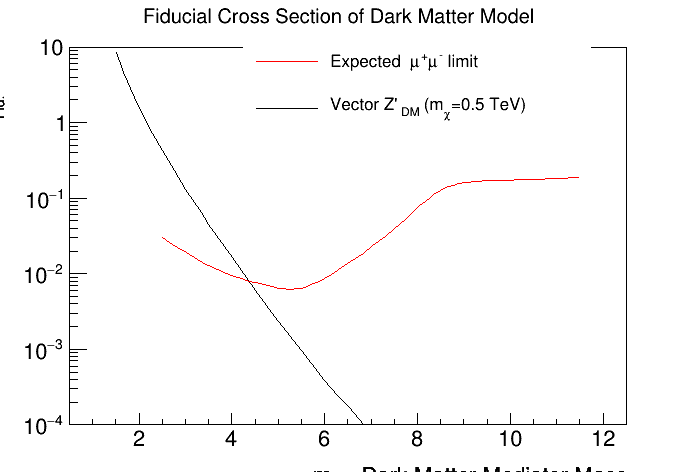

In [4]:
cfidXsec = ROOT.TCanvas()
cfidXsec.cd()
cfidXsec.SetLogy()

leg = ROOT.TLegend(0.35, 0.72, 0.85, 0.92, "")
leg.SetTextSize(0.04)
leg.SetFillColor(0)
leg.SetBorderSize(0)
leg.AddEntry(expLimit_mumu,"#font[42]{Expected #mu^{+}#mu^{-} limit}","l")
leg.AddEntry(fidXsec_500_mumu,"#font[42]{Vector Z'_{DM} (m_{#chi}=0.5 TeV)}","l")

fidXsec_500_mumu = file.Get("graphFidXsec_0p50_mumu")
fidXsec_500_mumu.GetYaxis().SetTitle("#sigma_{Fid.}#times BR")
fidXsec_500_mumu.GetXaxis().SetTitle("m_{Z'} - Dark Matter Mediator Mass")
fidXsec_500_mumu.SetTitle("Fiducial Cross Section of Dark Matter Model")

fidXsec_500_mumu.Draw("AC")
expLimit_mumu.Draw("C")
leg.Draw()
cfidXsec.Draw()

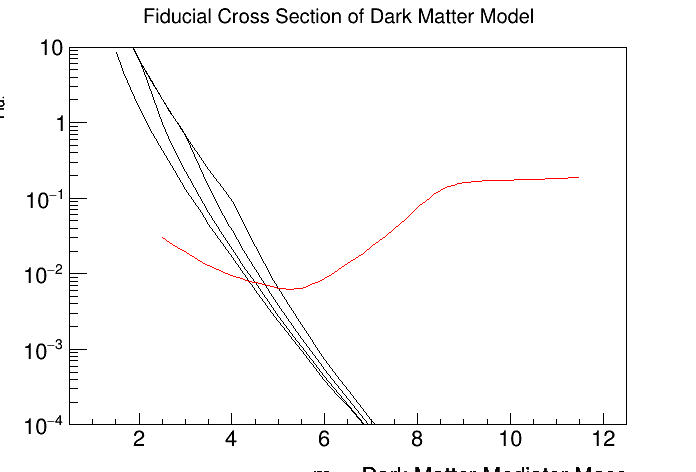

In [5]:
cfidXsecAll = ROOT.TCanvas()
cfidXsecAll.cd()
cfidXsecAll.SetLogy()

fidXsec_1000_mumu = file.Get("graphFidXsec_1p00_mumu")
fidXsec_1500_mumu = file.Get("graphFidXsec_1p50_mumu")
fidXsec_2000_mumu = file.Get("graphFidXsec_2p00_mumu")

fidXsec_500_mumu.Draw("AC")
fidXsec_1000_mumu.Draw("C")
fidXsec_1500_mumu.Draw("C")
fidXsec_2000_mumu.Draw("C")
expLimit_mumu.Draw("C")
cfidXsecAll.Draw()

In [6]:
def GetCrossing(expLimit,fidXsec):

    min = 0.0
    max = 10.0
    steps = 10000
    epsilon = 1
    mZp = 0.0

    for i in np.linspace(min,max,steps):
        if ROOT.TMath.Abs(expLimit.Eval(i)-fidXsec.Eval(i))<epsilon:
            epsilon = ROOT.TMath.Abs(expLimit.Eval(i)-fidXsec.Eval(i))
            mZp = i

    return mZp

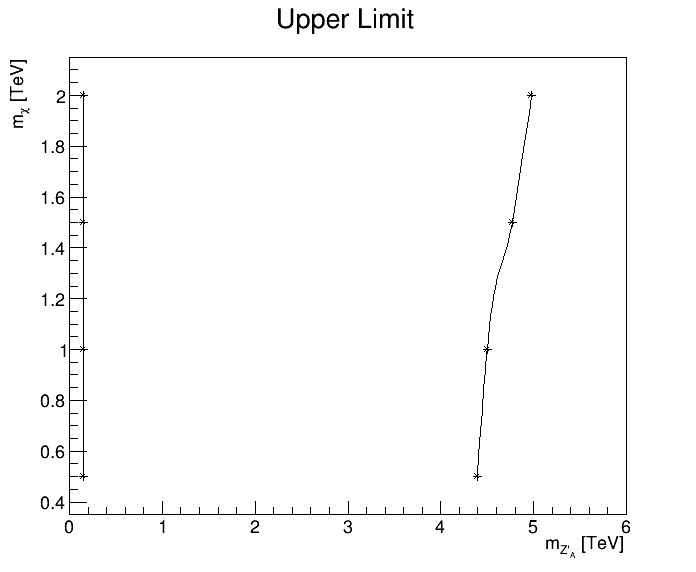

In [7]:
massDM = ['0p50','1p00','1p50','2p00']
mZp_lower,mZp_upper,mDM = array( 'd' ), array( 'd' ), array( 'd' )

mDM.extend([0.50,1.00,1.50,2.00])
mZp_lower.extend([0.15,0.15,0.15,0.15])
mZp_upper.extend([GetCrossing(expLimit_mumu,fidXsec_500_mumu),GetCrossing(expLimit_mumu,fidXsec_1000_mumu),GetCrossing(expLimit_mumu,fidXsec_1500_mumu),GetCrossing(expLimit_mumu,fidXsec_2000_mumu)])

exclusionGraph_lower = ROOT.TGraph(len(mDM),mZp_lower,mDM) # From Previous Results
exclusionGraph_upper = ROOT.TGraph(len(mDM),mZp_upper,mDM)
exclusionGraph_upper.SetTitle("Upper Limit")
exclusionGraph_upper.GetXaxis().SetTitle("m_{Z'}_{A} [TeV]")
exclusionGraph_upper.GetYaxis().SetTitle("m_{#chi} [TeV]")

c = ROOT.TCanvas("c","c",700,600)
c.cd()
exclusionGraph_upper.GetXaxis().SetLimits(0., 6.)
exclusionGraph_upper.Draw("AC*")
exclusionGraph_lower.Draw("C*")
c.Update()
ROOT.gPad.RedrawAxis()
c.Draw()